<div align="center">

# 📊🌍 Análisis de Sentimiento sobre el Discurso de Javier Milei en Davos desde la Perspectiva del Público Estadounidense

</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

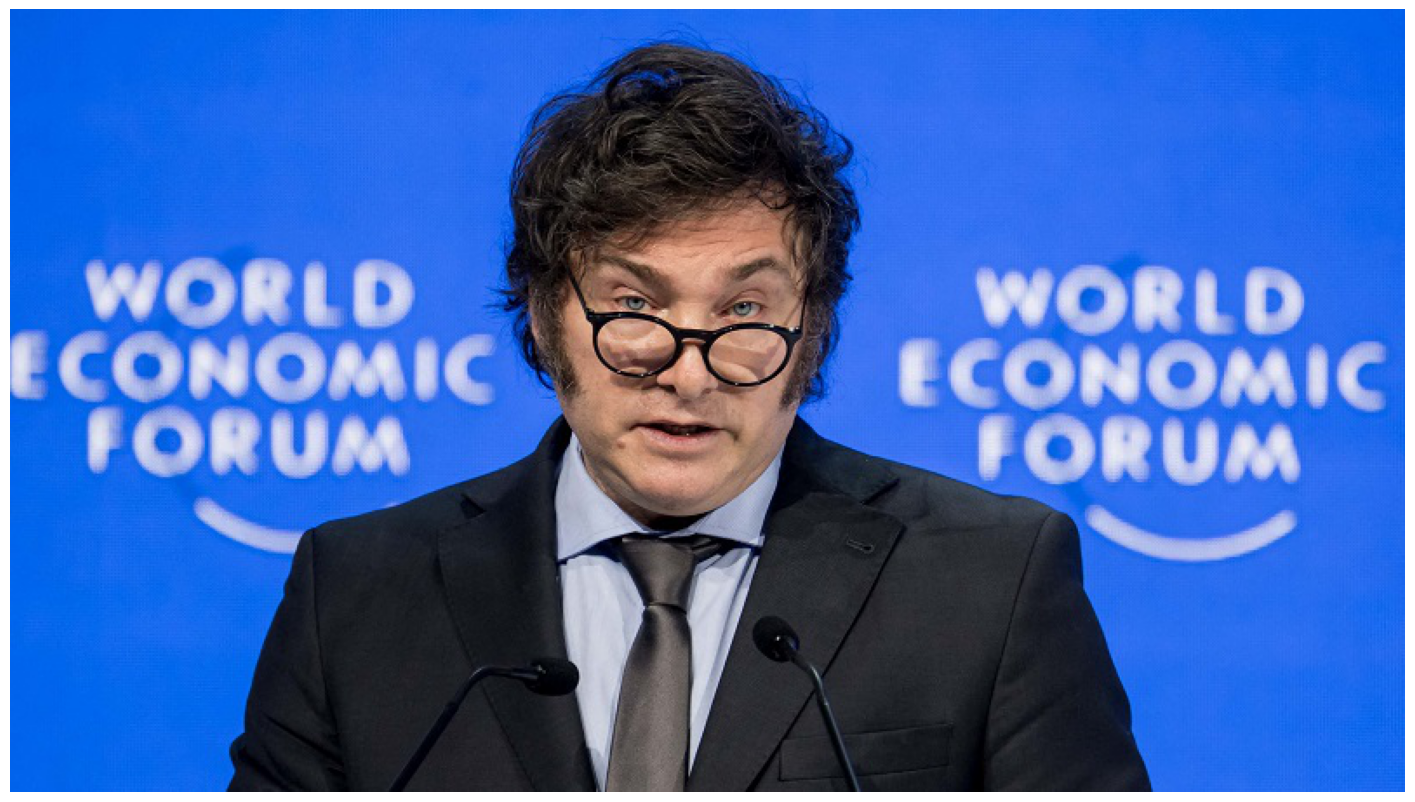

In [2]:
imagen_ruta = r"C:\Users\Maxi Mores\Desktop\Imágenes Proyectos\Milei_Davos.jpg"
img = mpimg.imread(imagen_ruta)
plt.figure(figsize=(18,11))
plt.imshow(img)
plt.axis('off')
plt.show()

## 🤔 ¿Qué impacto real tuvo el discurso de Milei en audiencias internacionales?

### 💬 Analizamos más de **8.000 comentarios** de usuarios estadounidenses en YouTube sobre el discurso del presidente en Davos

### 🧠 Aplicamos el algoritmo **VADER** para clasificar las opiniones en **positivas**, **negativas** y **neutras**

In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
from tqdm import tqdm

# Cargar CSV
df = pd.read_csv('comments.csv')  

# Inicializar VADER
vader_analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = vader_analyzer.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['comment'].apply(vader_sentiment)

# Guardar resultados
df.to_csv('comments_with_sentiment.csv', index=False)
print("✅ Análisis completado. Archivo guardado como 'comments_with_sentiment.csv'")

✅ Análisis completado. Archivo guardado como 'comments_with_sentiment.csv'


### 📈 Visualizamos la **distribución de percepciones** y detectamos patrones de aprobación espontánea

In [4]:
print("\n📌 Distribución de opiniones según VADER:")
print(df['vader_sentiment'].value_counts())


📌 Distribución de opiniones según VADER:
vader_sentiment
positive    4536
neutral     1802
negative    1751
Name: count, dtype: int64


### ✅ Inferimos el **grado de aceptación** del mensaje presidencial en el público norteamericano

In [5]:
# Contar cantidad de cada sentimiento
vader_counts = df['vader_sentiment'].value_counts()

# Calcular total
total = vader_counts.sum()

# Calcular porcentajes
vader_percentages = (vader_counts / total) * 100

# Mostrar resultados
print("📊 Porcentaje de opiniones según VADER:")
for sentiment in ['positive', 'neutral', 'negative']:
    percent = vader_percentages.get(sentiment, 0)
    print(f"{sentiment.capitalize()}: {percent:.2f}%")

📊 Porcentaje de opiniones según VADER:
Positive: 56.08%
Neutral: 22.28%
Negative: 21.65%
